In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def computeLiquidityForPriceSimplified(price, c, s, lam):
    return lam * s / ((lam*(price*c - s)/(price*s + c))**2 + 1)**(1/2)

def computeDerivativeLiquidityForPriceSimplified(price, c, s, lam):
    return -lam**3*s*(price*c - s)/((price*s+c)**3*((lam*(price*c-s)/(price*s + c))**2+1)**(3/2))

max liquidity price 3758.727358374513


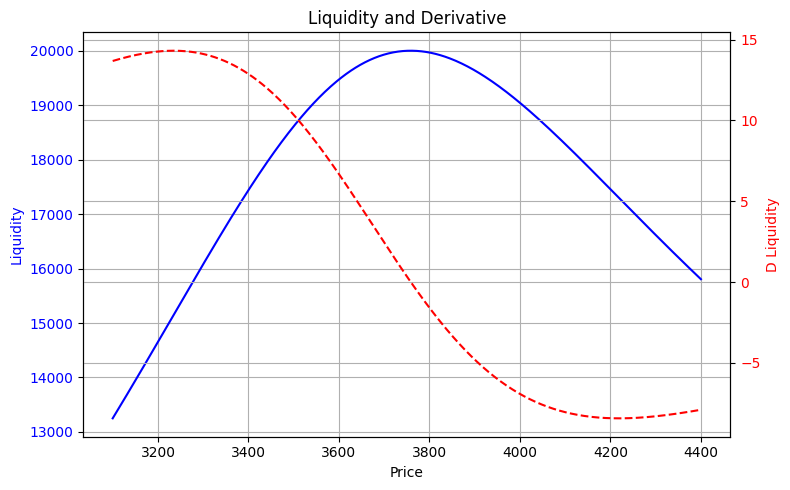

In [3]:
# alpha = 0.998502246630054917
# beta = 1.000200040008001600
# c = 0.707106781186547524
# s = 0.707106781186547524
# lam = 4000
# rate = 1.162658603238267306

# alpha = 0.999100809271655510
# beta = 1.006036217303822937
# c = 0.707036059900766447
# s = 0.707177495399846417
# lam = 3000
# rate = 1/1.209174542342395514

alpha = 3100
beta = 4400
c = 0.000266047486094289
s = 0.999999964609366945
lam = 20000
rate = 1

# alpha = 0.75
# beta = 1.25
# c = 0.707106781186547524
# s = 0.707106781186547524
# lam = 6
# rate = 3074.976000000000000000

# alpha = 0.980392156862745098
# beta = 1.052631578947368421
# c = 0.706043730947421854
# s = 0.708168235654385009
# lam = 50.000000000000000000
# rate = 1

print('max liquidity price', rate * s / c)

priceArray = np.linspace(alpha, beta, 500)
liquidity = [computeLiquidityForPriceSimplified(p, c, s, lam) for p in priceArray]
dLiquidity = [computeDerivativeLiquidityForPriceSimplified(p, c, s, lam) for p in priceArray]

startPrice = alpha*rate
endPrice = beta*rate
originalPriceArray = np.linspace(startPrice, endPrice, 500)

# Plot
fig, ax1 = plt.subplots(figsize=(8, 5))

# First y-axis
ax1.plot(originalPriceArray, liquidity, 'b-', label='Liquidity')
ax1.set_xlabel('Price')
ax1.set_ylabel('Liquidity', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)

# Second y-axis
ax2 = ax1.twinx()
ax2.plot(originalPriceArray, dLiquidity, 'r--', label='D Liquidity')
ax2.set_ylabel('D Liquidity', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.grid(True)

# Titles and layout
plt.title('Liquidity and Derivative')
fig.tight_layout()
plt.show()

In [15]:
def amm_price(x, y, cos_theta, sin_theta, lam, alpha, beta):
    num = (
        alpha * cos_theta * sin_theta * (lam**2 - 1) * (beta - 1)
        + alpha * beta * (sin_theta**2 + cos_theta**2 * lam**2)
        - beta * (lam**2 * sin_theta**2 + cos_theta**2)
        - (alpha - beta) * (-cos_theta * sin_theta * y * (lam**2 - 1) + x * (cos_theta**2 + lam**2 * sin_theta**2))
    )
    
    den = (
        alpha * cos_theta * lam**2 * sin_theta
        - alpha * cos_theta * sin_theta
        + beta * cos_theta**2 * lam**2
        + beta * sin_theta**2
        - cos_theta**2
        - cos_theta * lam**2 * sin_theta
        + cos_theta * sin_theta
        - lam**2 * sin_theta**2
        + (alpha - beta) * (-cos_theta * sin_theta * x * (lam**2 - 1) + y * (cos_theta**2 * lam**2 + sin_theta**2))
    )
    return num / den

print(amm_price(11803.8314, 2.308, c, s, lam, alpha, beta))

3758.6998359264194
